In [1]:
import sys
import pandas as pd
import json
import numpy as np
from helper import *
import argparse
from rsa import RSA
import matplotlib.pyplot as plt
import os

with open('config.json') as config_file:
    config = json.load(config_file)
data_path = config['data_path']

[['woman wearing black polo'], ['woman left']]
/scratch2/hle/refCOCO/test/imgs_by_id/372788.jpg


,box_alias,image_id,ann_id,ref_id,salience,x1,y1,w,h,TYPE_yolk,...,ATTR_thin,ATTR_decorative,ATTR_wrinkled,ATTR_peeling,ATTR_golden,ATTR_metallic,ATTR_back,ATTR_thick,ATTR_black and white,ATTR_leaning
0,man-1,372788,448303,18128,0.229197,266.336243,61.882633,169.858917,209.822113,0.000624,...,0.002494,0.002494,0.002494,0.002493,0.002494,0.002494,0.002494,0.002494,0.002494,0.002516
1,umbrella-1,372788,448303,18128,0.055260,329.241852,0.254159,150.889923,56.948597,0.000624,...,0.002494,0.002495,0.002494,0.002494,0.002494,0.002494,0.002494,0.002495,0.002494,0.002494
2,hair-1,372788,448303,18128,0.015803,86.052963,54.732845,55.571045,44.221622,0.000624,...,0.002493,0.002492,0.002493,0.002492,0.002492,0.002492,0.002494,0.002495,0.002492,0.002492
3,hair-2,372788,448303,18128,0.016792,307.764191,74.314384,55.701355,46.879128,0.000624,...,0.002493,0.002493,0.002493,0.002493,0.002493,0.002493,0.002494,0.002497,0.002494,0.002493
4,bananas-1,372788,448303,18128,0.070132,15.528293,236.097443,147.642319,73.864624,0.000624,...,0.002494,0.002495,0.002493,0.002493,0.002494,0.002493,0.002493,0.002494,0.002493,0.002494
5,shirt-1,372788,448303,18128,0.087058,28.633011,105.510834,125.487839,107.879471,0.000624,...,0.002491,0.002491,0.002492,0.002491,0.002491,0.002491,0.002491,0.002492,0.002493,0.002491
6,people-1,372788,448303,18128,0.391741,47.250561,60.418438,333.374420,182.724457,0.000624,...,0.002494,0.002494,0.002494,0.002494,0.002494,0.002494,0.002495,0.002494,0.002495,0.002499
7,umbrella-2,372788,448303,18128,0.029847,0.000000,43.227821,96.082573,48.305000,0.000624,...,0.002494,0.002494,0.002494,0.002493,0.002494,0.002493,0.002494,0.002494,0.002494,0.002493
8,woman-1,372788,448303,18128,0.070241,247.271011,106.016541,74.636734,146.341965,0.000624,...,0.002495,0.002494,0.002494,0.002494,0.002494,0.002494,0.002494,0.002494,0.002494,0.002521
9,woman-2,372788,448303,18128,0.030804,193.301514,84.270767,38.454529,124.561859,0.000624,...,0.002494,0.002493,0.002493,0.002493,0.002493,0.002493,0.002495,0.002494,0.002495,0.002511


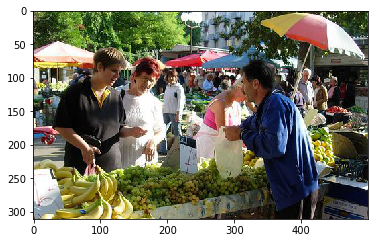

In [10]:
file_id = 137#67#21540#3278#182

df = pd.read_csv(os.path.join(data_path,f'refCOCO/test/attr_tables/attr_{file_id}.tsv'), encoding='utf-8',sep='\t')

with open(os.path.join(data_path,f'refCOCO/test/labels/lab_{file_id}.json')) as json_file:
    label = json.load(json_file)
refs = [[r] for r in label['ref_sents']]
print(refs)
img_id = df['image_id'][0]
filename = os.path.join(data_path, f'refCOCO/test/imgs_by_id/{img_id}.jpg')
print(filename)
image = plt.imread(filename)
plt.imshow(image)
df

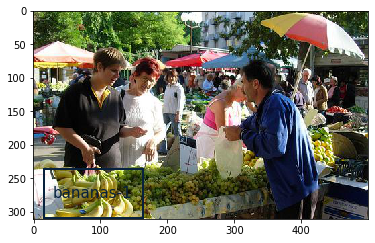

In [11]:
box_data = df[['box_alias', 'x1','y1','w','h']]
fig,ax = plt.subplots(1)
img = image

ax.imshow(img)
rng = [i for i in range(len(box_data))]
for i in [4]:#rng[:]:
    name, x,y,w,h = list(box_data.iloc[i,:])
    ax = draw_box_obj(name,x,y,w,h,img,ax)

['woman wearing black polo', 'woman left']


(<matplotlib.axes._subplots.AxesSubplot at 0x7f185c7194d0>,
 array([0.59613648, 0.10941626, 0.38805584]))

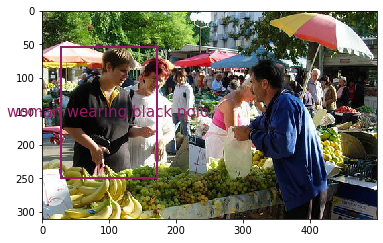

In [12]:
print(label['ref_sents'])
bbox = label['bbox'][0]
sentence = label['ref_sents'][0]
fig,ax_true_label = plt.subplots(1)
ax_true_label.imshow(img)
draw_box_obj(sentence,bbox[0],bbox[1],bbox[2],bbox[3],img,ax_true_label)

In [5]:
matched_label = np.load('test_imgs_label_matching.npy', allow_pickle=True)
rel_load = np.load(f'./test_relation_extraction.npy', allow_pickle=True)
generated_relation = rel_load[file_id]
rsa_agent = RSA(df,generated_relations=generated_relation)
#targets = [matched_label[file_id][j][1] for j in range(min(3, len(matched_label[file_id])))]

# word_lists = [rsa_agent.full_speaker(target) for target in targets]

# expression = [' '.join(word_lists[j][::-1]) for j in range(len(word_lists))]

In [6]:
matched_label[67]

[[4, 'man-1', 0.8041150929567431],
 [23, 'bench-1', 0.4733833924784896],
 [9, 'shirt-1', 0.4329310531384314],
 [18, 'tshirt-1', 0.42930191695738706],
 [16, 'dirt-1', 0.2873217028550692]]

In [14]:
# the top 3 guesses based on top 3 best match
# print(targets)
# print(expression)

# def full_speaker(self, obj):
#         output = []
#         prior = self.objectPrior()
#         t = ''
#         print('HELLOSDFDSF')
#         for iter in range(10):
#             # print('iteration',iter)
#             print('prior:', prior)
#             utts,pro, utterance_type = self.speaker(obj, prior, t, output) 
#             #print(iter, prior)
#             if len(utts) > 0:
#                 idx=np.argmax(pro)
#                 # print("YOYO",utts[idx])
#             if pro[idx] <= 0:
#                 new_c = prior
#             else:
#                 u = utts[idx]
#                 new_c = self.literal_listener(u,prior, utterance_type)
#                 output.append(u)
#             ent = self.entropy(new_c)
#             # print(iter,'new_c',new_c)
#             # print(iter,'ent',ent)
#             prior = new_c
#             t = output[0]
#             if ent <= BOUND:
#                 break
#         return output
# rsa_agent.full_speaker = full_speaker

In [8]:
rsa_agent.full_speaker('man-1')

/scratch2/hle/git/rsa_refer/rsa.py:122: RuntimeWarning: invalid value encountered in true_divide
  return result/np.sum(result)


['person', 'blonde']